# Week 6 Assignment - The Best Classifier

In this assignment, a historical dataset from loan applications wil be analysed with the following classification algorithm :
1. k-Nearest Neighbours
2. Decision Tree
3. Support Vector Machine
4. Logistic Regression

The results of the analysis will be reported as the accuracy of each classifier, using the following metrics when applicable:
1. Jaccard index
2. F1-score 
3. Log Loss

### First let's load required libraries for this assignment

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
import scipy.optimize as opt

from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

### Then we download the required the historical dataset from loan applications

In [ ]:
#!pip install wget
import wget
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv'
wget.download(url)

### Load the data into a dataframe and display the first 5 rows of the dataframe

In [2]:
df = pd.read_csv('loan_train.csv')
print('size = ', df.size)
df.tail()

size =  3460


,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
341,394,394,COLLECTION,800,15,9/11/2016,9/25/2016,32,High School or Below,male
342,395,395,COLLECTION,1000,30,9/11/2016,10/10/2016,25,High School or Below,male
343,397,397,COLLECTION,800,15,9/12/2016,9/26/2016,39,college,male
344,398,398,COLLECTION,1000,30,9/12/2016,11/10/2016,28,college,male
345,399,399,COLLECTION,1000,30,9/12/2016,10/11/2016,26,college,male


Let's explore the given data set with standard statistics

In [3]:
df.describe(include='all')

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
count,346.000000,346.000000,346,346.000000,346.000000,346,346,346.000000,346,346
unique,NaN,NaN,2,NaN,NaN,7,23,NaN,4,2
top,NaN,NaN,PAIDOFF,NaN,NaN,9/11/2016,10/10/2016,NaN,High School or Below,male
freq,NaN,NaN,260,NaN,NaN,166,90,NaN,151,294
mean,202.167630,202.167630,NaN,943.641618,22.653179,NaN,NaN,30.939306,NaN,NaN
std,115.459715,115.459715,NaN,109.425530,7.991006,NaN,NaN,6.039418,NaN,NaN
min,0.000000,0.000000,NaN,300.000000,7.000000,NaN,NaN,18.000000,NaN,NaN
25%,107.250000,107.250000,NaN,900.000000,15.000000,NaN,NaN,27.000000,NaN,NaN
50%,204.500000,204.500000,NaN,1000.000000,30.000000,NaN,NaN,30.000000,NaN,NaN
75%,298.750000,298.750000,NaN,1000.000000,30.000000,NaN,NaN,35.000000,NaN,NaN


From above table we have some idea on how the data set looks like. 

### Data pre-processing and selection

Let's first select the only required columns to be analysed, rearrange the columns and put them into new data frame **feature_df**

In [4]:
feature_df = df[['age','education', 'Gender', 'Principal', 'terms','loan_status']]
feature_df.head()

,age,education,Gender,Principal,terms,loan_status
0,45,High School or Below,male,1000,30,PAIDOFF
1,33,Bechalor,female,1000,30,PAIDOFF
2,27,college,male,1000,15,PAIDOFF
3,28,college,female,1000,30,PAIDOFF
4,29,college,male,1000,30,PAIDOFF


Explore each unique category input data in all columns

In [5]:
print('education category = ', feature_df['education'].unique())
print('Gender             = ', feature_df['Gender'].unique())
print('Principal          = ', feature_df['Principal'].unique())
print('terms              = ', feature_df['terms'].unique())
print('loan status        = ', feature_df['loan_status'].unique())

education category =  ['High School or Below' 'Bechalor' 'college' 'Master or Above']
Gender             =  ['male' 'female']
Principal          =  [1000  800  300  900  500]
terms              =  [30 15  7]
loan status        =  ['PAIDOFF' 'COLLECTION']


'Gender' and 'education' category descibe the gender and education level of each applicant, respectively. 'Principal' describes the amount of loan applicant is requesting in USD. 'Terms' describes the duration of loan is paid off. 'Loan status' describes the status of loan for each applicant. 

Using the feature_df dataframe above, declare the following variables:
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </li>
    <li> <b> y </b> as the <b> response vector (target) </b> </li>
</ul>

In [6]:
X = feature_df[['age', 'education', 'Gender', 'Principal', 'terms']].values  
X[0:5]

array([[45, 'High School or Below', 'male', 1000, 30],
       [33, 'Bechalor', 'female', 1000, 30],
       [27, 'college', 'male', 1000, 15],
       [28, 'college', 'female', 1000, 30],
       [29, 'college', 'male', 1000, 30]], dtype=object)

In [7]:
y = feature_df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

As you may figure out, some features in this dataset are categorical such as Gender, education or loan_status. In order to ease the analysis, these features have to be converted to numerical values. Here, pandas.get_dummies() convert categorical variable into dummy/indicator variables.

In [8]:
from sklearn import preprocessing

le_ed = preprocessing.LabelEncoder()
le_ed.fit(['High School or Below', 'Bechalor', 'college', 'Master or Above'])
X[:,1] = le_ed.transform(X[:,1]) 

le_gdr = preprocessing.LabelEncoder()
le_gdr.fit(['male', 'female'])
X[:,2] = le_gdr.transform(X[:,2]) 

print('X = ',X[0:5])

X =  [[45 1 1 1000 30]
 [33 0 0 1000 30]
 [27 3 1 1000 15]
 [28 3 0 1000 30]
 [29 3 1 1000 30]]


Split train and test set. Here we split the train and set test randomly with ratio train:test set is 80:20. Furthermore, When comparing machine learning algorithms, it is required that they are fit and evaluated on the same subsets of the dataset. To ensure this, we set the random_state to any integer value.

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


Having the train and test set above, we are now ready to do the analysis.

## 1. k-Nearest Neighbors Analysis

Import the required library

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

Calculate the accuracy of k-Nearest Neighbors for different k's using accuracy score

In [46]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.61, 0.53, 0.67, 0.61, 0.73, 0.73, 0.73, 0.69, 0.73])

Plot model accuracy for different number of neighbors

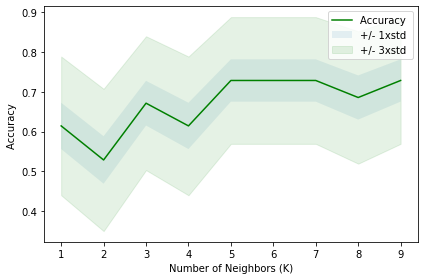

In [47]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [48]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7285714285714285 with k= 5


From the above we can conclude that the best accuracy for k-Nearest Neighbors is when k=5. Now let's get the predicted yhat for k=5 and use it to further analysis with the following model evaluation metrics: Jaccard index, F1 score and Log Loss.

**Jaccard index** is defined as the ratio between the size of intersection and the size of union of actual and predicted label sets. The closer value of the Jaccard index to one (1), the more accurate the model.

**F1 score** is defined as the harmonic average of the precision and recall calculated from the confusion matrix. The higher the score to one (1) the more accuracy the model is.

**Logarithmic Loss (Log Loss)** measures the performance of a classifier where the predicted output is probability value between zero (0) and one (1). In here, classifier with lower Log Loss (close to zero) has better accuracy. Since the response we have in this model can be converted to {'PAIDOFF':0, 'COLLECTION':1}, this evaluation metric can be used.  

In [49]:
neigh     = KNeighborsClassifier(n_neighbors = 5).fit(X_train,y_train)
yhat      = neigh.predict(X_test)
yhat_prob = neigh.predict_proba(X_test)

print('yhat = ', yhat[0:5])
print('yhat_prob = ', yhat_prob[0:5])

yhat =  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']
yhat_prob =  [[0.2 0.8]
 [0.  1. ]
 [0.2 0.8]
 [0.8 0.2]
 [0.4 0.6]]


#### k-Nearest Neighbors model evaluation

First lets call the following library and define the following function

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [51]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In order to compute confusion matrix, we need to transform the target label (y_test, yhat) into zero (0) and one (1) format

In [52]:
le_loanstat = preprocessing.LabelEncoder()
le_loanstat.fit(['PAIDOFF', 'COLLECTION'])
y_test = le_loanstat.transform(y_test)
yhat   = le_loanstat.transform(yhat)

              precision    recall  f1-score   support

           0       0.25      0.13      0.17        15
           1       0.79      0.89      0.84        55

    accuracy                           0.73        70
   macro avg       0.52      0.51      0.51        70
weighted avg       0.67      0.73      0.70        70

Confusion matrix, without normalization
[[ 2 13]
 [ 6 49]]
f1-score       =  0.6953867388649997
jaccard index  =  0.7205882352941176
log_loss value =  1.9770883046449184


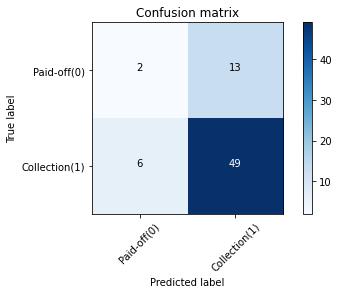

In [53]:
# initiate empty array f1,ji & ll to store 
f1 = []
ji = []
ll = []

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Paid-off(0)','Collection(1)'],normalize= False,  title='Confusion matrix')

# check f1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 
print('f1-score       = ', f1_score(y_test, yhat, average='weighted'))
f1 = np.append(f1, f1_score(y_test, yhat, average='weighted'))

# check jaccard index accuracy
from sklearn.metrics import jaccard_score
print('jaccard index  = ', jaccard_score(y_test, yhat))
ji = np.append(ji, jaccard_score(y_test, yhat))

# print log loss
from sklearn.metrics import log_loss
yhat_prob
print('log_loss value = ', log_loss(y_test, yhat_prob))
ll = np.append(ll, log_loss(y_test, yhat_prob).round(2))

## 2. Decision Tree Analysis

For the sake of comparison, we will use the same train/test split set as described above. 

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


Lets create an instance of the DecisionTreeClassifier called loandisc. Inside of the classifier, specify criterion="gini" which measures the node's impurity. A node is 'pure' (gini=0) if all training instances belong to the same class.

In [55]:
loandisc = DecisionTreeClassifier(criterion="gini", max_depth = 4)
loandisc # it shows the default parameters

DecisionTreeClassifier(max_depth=4)

We fit the training feature matrix X_trainset and training response vector y_trainset

In [56]:
loandisc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

We can make some predictions and its probability on the testing dataset

In [57]:
yhat      = loandisc.predict(X_test)
yhat_prob = loandisc.predict_proba(X_test)

You can print out yhat and y_test if you want to visually compare the prediction to the actual values.

In [58]:
print('yhat      = ', yhat[0:5])
print('y_test    = ', y_test[0:5])
print('yhat_prob = ', yhat_prob[0:5])

yhat      =  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']
y_test    =  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']
yhat_prob =  [[0.27 0.73]
 [0.27 0.73]
 [0.27 0.73]
 [0.52 0.48]
 [0.27 0.73]]


### Tree Visualization

Lets visualize the tree

In [59]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

In [60]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

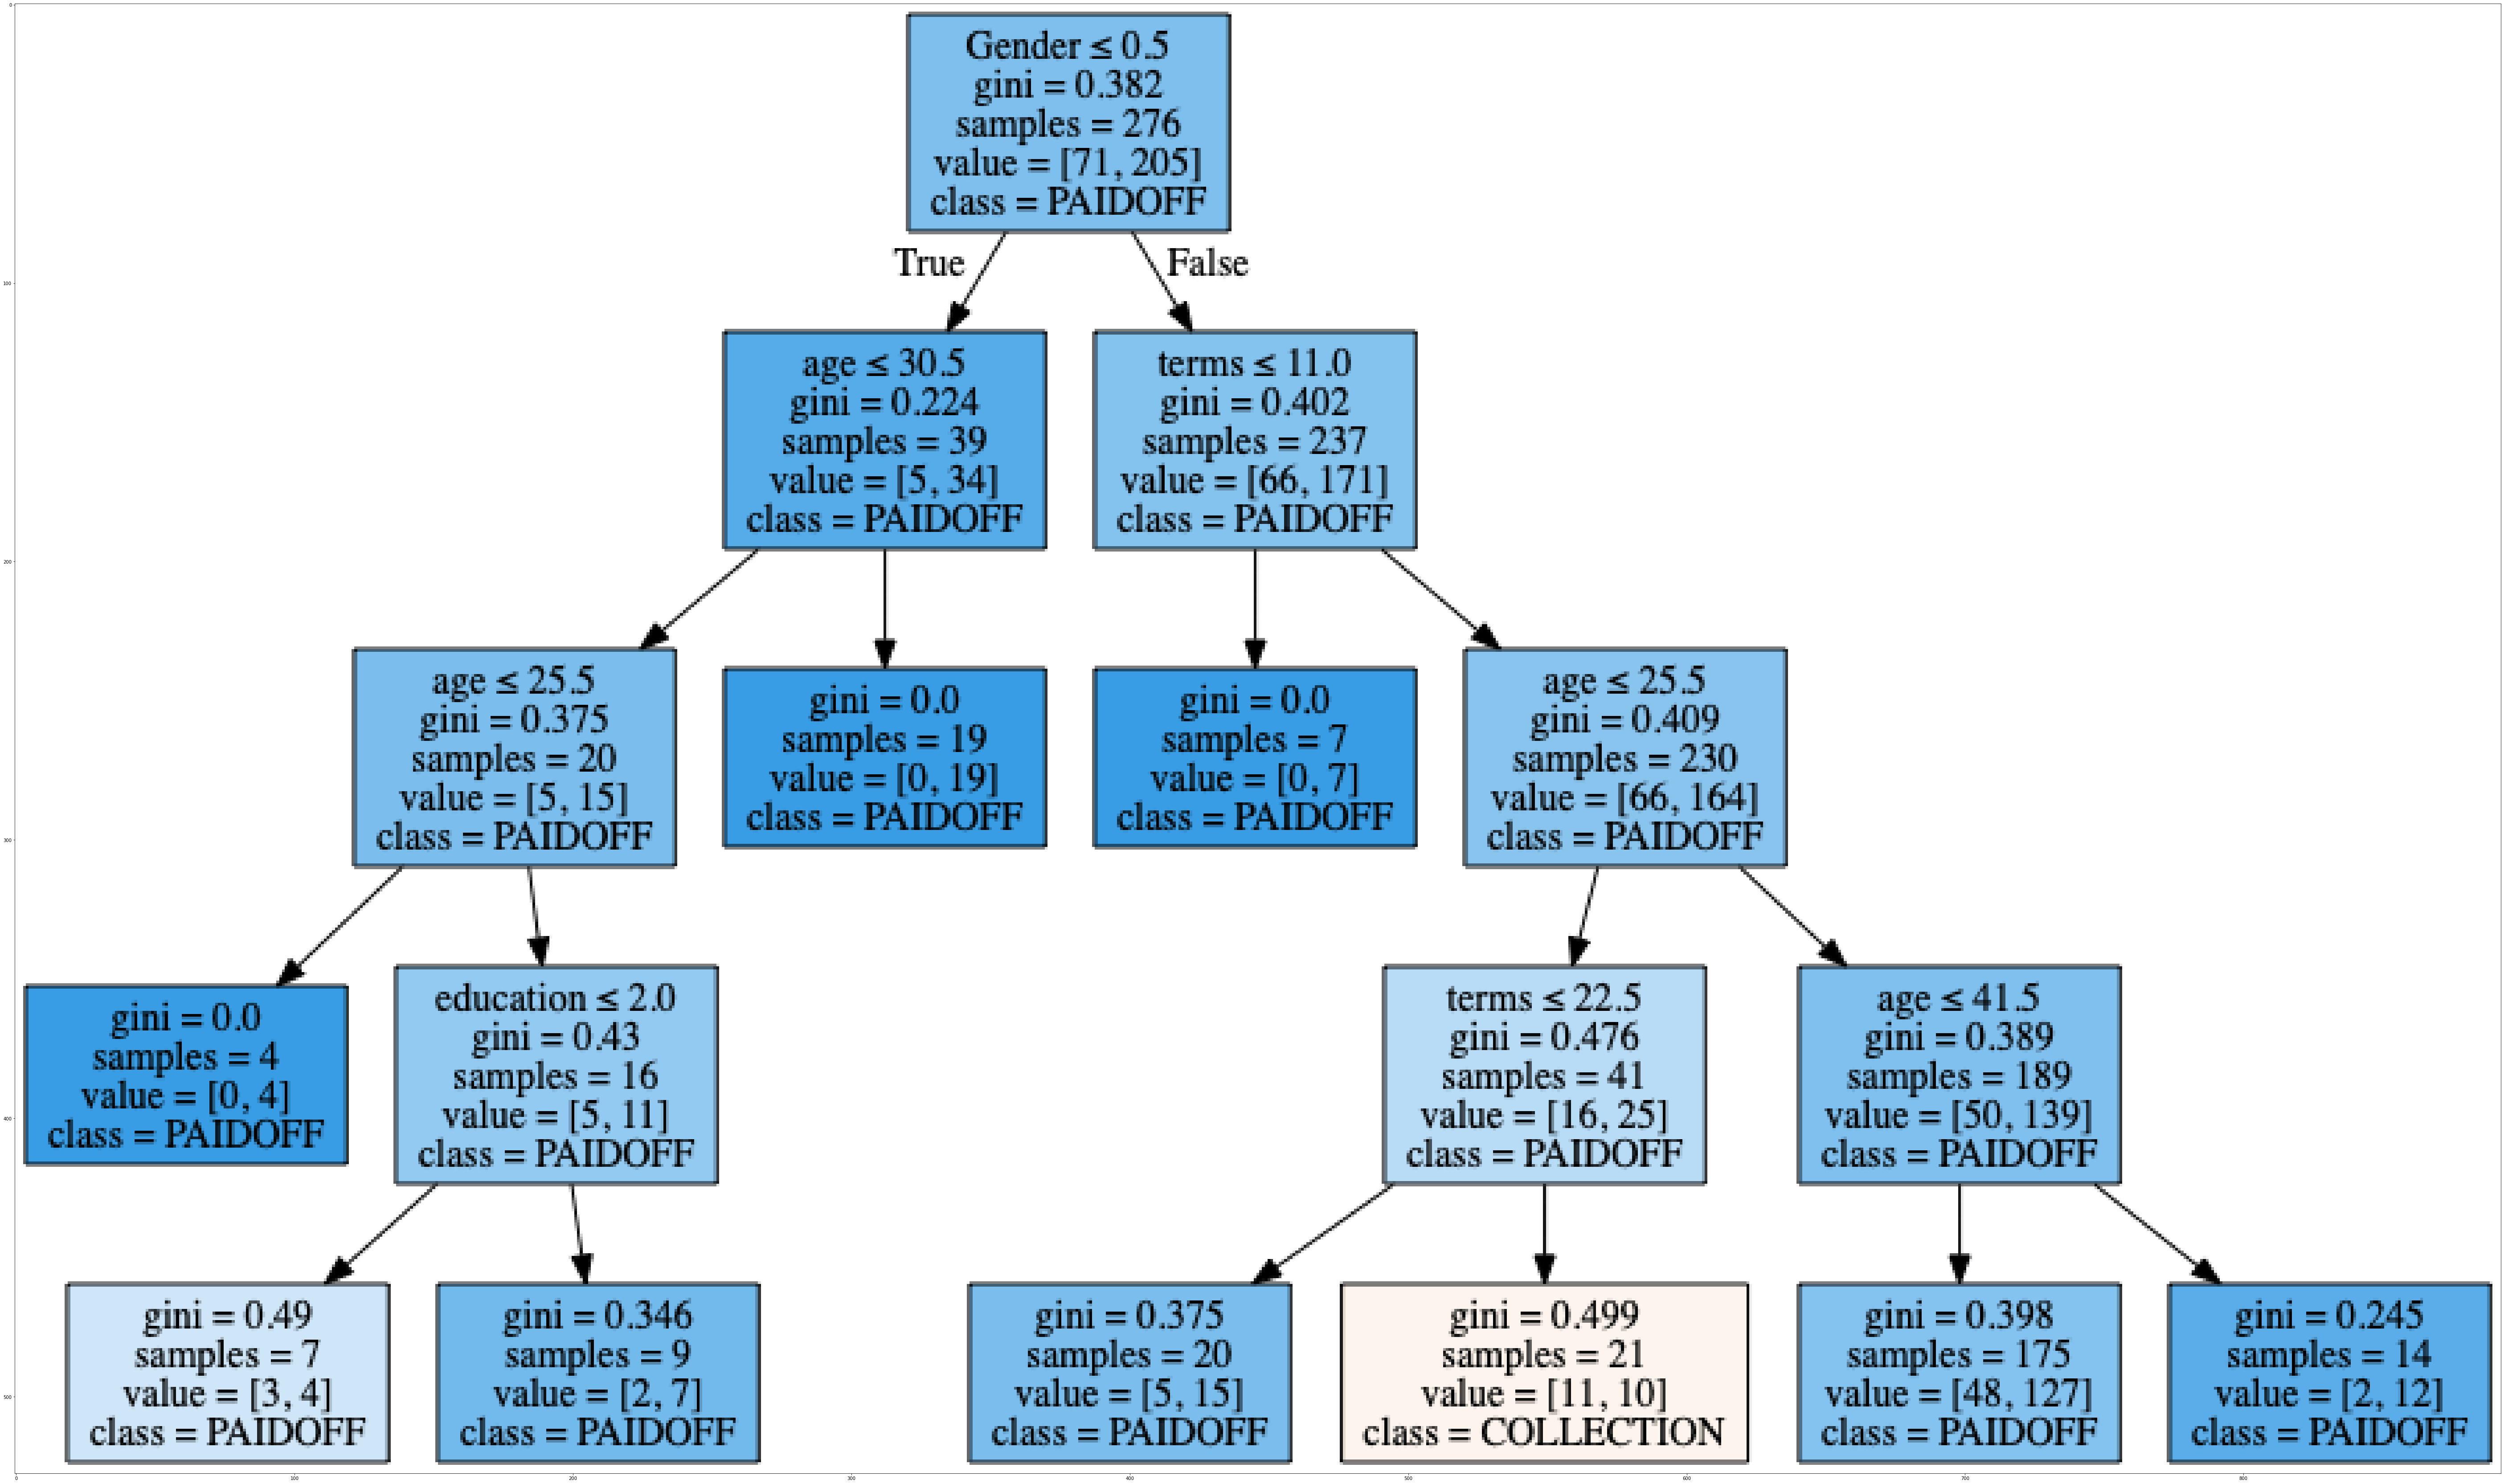

In [61]:
dot_data = StringIO()
filename = "loandectree.png"
featureNames = feature_df.columns[0:5]
targetNames = feature_df["loan_status"].unique().tolist()
out=tree.export_graphviz(loandisc,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

#### Decision Tree model evaluation

Let's evaluate the model by using the same procedure as above. First, ensure the target label (y_test, yhat) is transformed into zero (0) and one (1) format

In [62]:
le_loanstat = preprocessing.LabelEncoder()
le_loanstat.fit(['PAIDOFF', 'COLLECTION'])
y_test = le_loanstat.transform(y_test)
yhat   = le_loanstat.transform(yhat)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.77      0.93      0.84        55

    accuracy                           0.73        70
   macro avg       0.39      0.46      0.42        70
weighted avg       0.61      0.73      0.66        70

Confusion matrix, without normalization
[[ 0 15]
 [ 4 51]]
f1-score       =  0.6623376623376623
jaccard index  =  0.7285714285714285
log_loss value =  0.9816152841206267


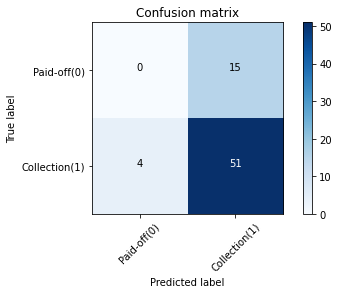

In [63]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Paid-off(0)','Collection(1)'],normalize= False,  title='Confusion matrix')

# check f1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 
print('f1-score       = ', f1_score(y_test, yhat, average='weighted'))
f1 = np.append(f1, f1_score(y_test, yhat, average='weighted'))

# check jaccard index accuracy
from sklearn.metrics import jaccard_score
print('jaccard index  = ', jaccard_score(y_test, yhat))
ji = np.append(ji, jaccard_score(y_test, yhat))

# print log loss
from sklearn.metrics import log_loss
yhat_prob
print('log_loss value = ', log_loss(y_test, yhat_prob))
ll = np.append(ll, log_loss(y_test, yhat_prob).round(2))

## 3. Support Vector Machine (SVM) Analysis

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is, called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:
1. Linear
2. Polynomial
3. Radial basis function (RBF)
4. Sigmoid

For this analysis we will use **RBF** as the kernel function. Now lets import the required library to run this analysis. Furthermore, for the sake of comparison, the same train/test split set as described above will be used. 

In [64]:
from sklearn import svm

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

clf = svm.SVC(kernel='rbf',gamma='auto')
clf.fit(X_train, y_train) 

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


SVC(gamma='auto')

After being fitted, the model can then be used to predict new values:

In [65]:
yhat      = clf.predict(X_test)
#yhat_prob = clf.predict_proba(X_test) #predict_proba is not available when  probability=False

print('yhat      = ', yhat[0:5])
print('y_test    = ', y_test[0:5])


yhat      =  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'COLLECTION' 'PAIDOFF']
y_test    =  ['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


#### SVM model evaluation

Let's evaluate the model by using the same procedure as above. First, ensure the target label (y_test, yhat) is transformed into zero (0) and one (1) format

In [66]:
le_loanstat = preprocessing.LabelEncoder()
le_loanstat.fit(['PAIDOFF', 'COLLECTION'])
y_test = le_loanstat.transform(y_test)
yhat   = le_loanstat.transform(yhat)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.78      0.95      0.85        55

    accuracy                           0.74        70
   macro avg       0.39      0.47      0.43        70
weighted avg       0.61      0.74      0.67        70

Confusion matrix, without normalization
[[ 0 15]
 [ 3 52]]
f1-score       =  0.6697892271662764
jaccard index  =  0.7428571428571429
log_loss value =  0.9816152841206267


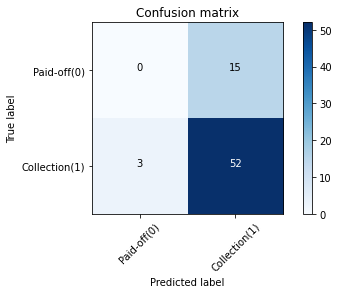

In [67]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Paid-off(0)','Collection(1)'],normalize= False,  title='Confusion matrix')

# check f1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 
print('f1-score       = ', f1_score(y_test, yhat, average='weighted'))
f1 = np.append(f1, f1_score(y_test, yhat, average='weighted'))

# check jaccard index accuracy
from sklearn.metrics import jaccard_score
print('jaccard index  = ', jaccard_score(y_test, yhat))
ji = np.append(ji, jaccard_score(y_test, yhat))

# print log loss
from sklearn.metrics import log_loss
yhat_prob
print('log_loss value = ', log_loss(y_test, yhat_prob))
#ll = np.append(ll, log_loss(y_test, yhat_prob))
ll = np.append(ll, 'NA')

Please be noted that Log Loss cannot be computed in this model evaluation.

## 4. Logistic Regression Analysis

Let's now build our model based on Logistic Regression from Scikit-learn package. This function implements logistic regression and can use different numerical optimizers to find parameters, including ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’ solvers. In this analysis we choose 'liblinear'. For the sake of comparison, the same train/test split set as described above will be used.

In [68]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

Train set: (276, 5) (276,)
Test set: (70, 5) (70,)


LogisticRegression(C=0.01, solver='liblinear')

In [69]:
yhat = LR.predict(X_test)
yhat[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [70]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob[0:5]

array([[0.31, 0.69],
       [0.23, 0.77],
       [0.2 , 0.8 ],
       [0.35, 0.65],
       [0.26, 0.74]])

#### Logistic Regression model evaluation

Let's evaluate the model by using the same procedure as above. First, ensure the target label (y_test, yhat) is transformed into zero (0) and one (1) format

In [71]:
le_loanstat = preprocessing.LabelEncoder()
le_loanstat.fit(['PAIDOFF', 'COLLECTION'])
y_test = le_loanstat.transform(y_test)
yhat   = le_loanstat.transform(yhat)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.79      1.00      0.88        55

    accuracy                           0.79        70
   macro avg       0.39      0.50      0.44        70
weighted avg       0.62      0.79      0.69        70

Confusion matrix, without normalization
[[ 0 15]
 [ 0 55]]
f1-score       =  0.6914285714285714
jaccard index  =  0.7857142857142857
log_loss value =  0.5558638821364388


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


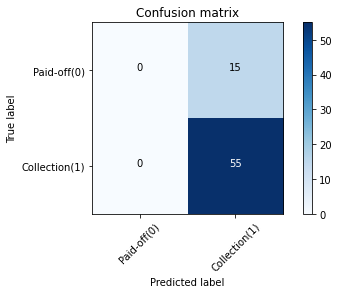

In [72]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Paid-off(0)','Collection(1)'],normalize= False,  title='Confusion matrix')

# check f1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 
print('f1-score       = ', f1_score(y_test, yhat, average='weighted'))
f1 = np.append(f1, f1_score(y_test, yhat, average='weighted'))

# check jaccard index accuracy
from sklearn.metrics import jaccard_score
print('jaccard index  = ', jaccard_score(y_test, yhat))
ji = np.append(ji, jaccard_score(y_test, yhat))

# print log loss
from sklearn.metrics import log_loss
yhat_prob
print('log_loss value = ', log_loss(y_test, yhat_prob))
ll = np.append(ll, log_loss(y_test, yhat_prob).round(2))

In [76]:
print('model type    = [k-NN DesTree SVM LogReg]')
print('f1 score      = ', f1)
print('jaccard index = ', ji)
print('log loss      = ', ll)

model type    = [k-NN DesTree SVM LogReg]
f1 score      =  [0.7  0.66 0.67 0.69]
jaccard index =  [0.72 0.73 0.74 0.79]
log loss      =  ['1.98' '0.98' 'NA' '0.56']


Based on the above output we can conclude the following. For the same input set data point

- The best model based on f1 score      : k-Nearest Neighbors with k=5
- The best model based on jaccard index : Logistic Regression
- The best model based on the log loss  : Logistic Regression